In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below** (in case the file names get mixed up)

In [2]:
#Audrey Bovet

# Dataset

Let's load data for classification. This data is generated and does not a precise meaning: the idea will be to build intuition about what is going on with different models.

Dataset can be downloaded here: https://drive.google.com/file/d/1Sy0Ly4Xj8fzPAiPru9oFS6evgQjuNMs4/view?usp=sharing

In [3]:
# Load the dataset;
# make sure that the file is located in the same folder as the notebook
# (or change the path)
dataset = np.load("dataset.npy")

In [28]:
# Extract features and targets
X = dataset[:,:2] # features are first 2 columns
y = dataset[:,-1] # labels are last column
print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (300, 2)


# Data preparation

**Split the dataset into one training and one testing sets.** You can use the sklearn.model_selection.train_test_split function (but you don't have to).

We shall use the name X_train and X_test (respectively y_train and y_test) to refer to the samples (respectively labels) of these sets.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Bagging and boosting

**Fit a bagging model on the dataset, and measure your performance.**

Make sure your methodology is correct.

In [30]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

hyperparameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

randomforest = RandomForestClassifier(bootstrap=True)


grid_search = GridSearchCV(
    estimator=randomforest,
    param_grid=hyperparameters,
    cv=5,                
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Test accuracy:", test_acc)

Best hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Best CV accuracy: 0.9552439024390245
Test accuracy: 0.9696969696969697


**Display the resulting probability heatmap**

In [31]:
print(best_rf.n_features_in_)

2


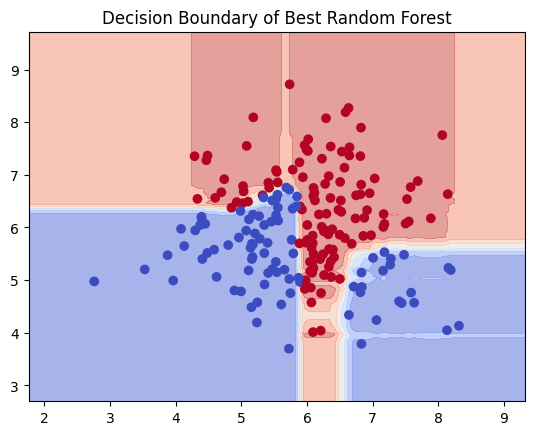

In [33]:
disp = DecisionBoundaryDisplay.from_estimator(
    best_rf,
    X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Decision Boundary of Best Random Forest")
plt.show()

**Fit a boosting model on the dataset, measure the performance and display the heatmap.**

## Multi-class, higher dimension classification

For this part, we are going to use the MNIST dataset again. We can download a lower-dimension version of the one we used in lab 3, with images of size 8x8, using scikit-learn utility functions. Initially, values are between 0 and 16. We will normalize them to values between 0 and 1.

In [6]:
from sklearn.datasets import load_digits

In [7]:
digits = load_digits(return_X_y=False)

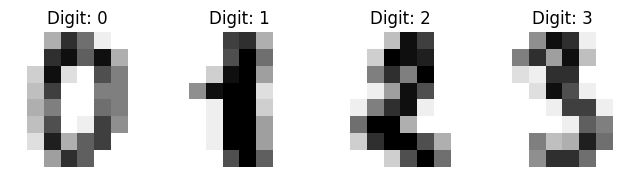

In [8]:
# Display the first 4 digits
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3)) # Create 4 subplots on 1 row
for ax, x, y in zip(axes, digits.data, digits.target):
    ax.set_axis_off() # do not display scale on axes
    img = x.reshape(8,8) / 16 # resize 64 dim vector as an 8 x 8 array of pixels and scale values to 0-1
    ax.imshow(img, cmap=plt.cm.gray_r, vmin=0, vmax=1) # display image in gray scale, with values from 0 to 1
    ax.set_title(f"Digit: {y}")

We will only keep digits 1, 2 and 3 to simplify things.

In [9]:
# only keep features for which target is 1, 2, or 3 
X_123, y_123 = zip(*[(x, y) for x, y in zip(digits.data, digits.target) if y in [1,2,3]])
X_123, y_123 = np.array(X_123) / 16, np.array(y_123) # normalizing training features to values between 0 and 1
print(f"Number of samples kept: {X_123.shape[0]}")

Number of samples kept: 542


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_123, y_123, test_size=0.20, random_state=42)
print(f"Training samples: {y_train.shape[0]}, test samples: {y_test.shape[0]}")

Training samples: 433, test samples: 109


**Fit a model on this multi-class dataset, and display the resulting decision boundary**

Here, we have more than 2 classes, and the dataset is not 2D: you will have to think about a solution that is a bit different from what we did in the rest of the lab.